Организационый текст, не относящийся к заданиям, удалил  
Все ссылочки внизу ноутбука 

# Как проверять?

Ставьте полный балл, если выполнены все рекомендации или сделано что-то более интересное и сложное. За каждый отсустствующий пункт из рекомендация снижайте 1 балл.

# Метрика

Перед решением любой задачи важно понимать, как будет оцениваться ваше решение. В данном случае мы используем стандартную для задачи классификации метрику ROC-AUC. Ее можно вычислить используя только предсказанные вероятности и истинные классы без конкретного порога классификации + она раотает даже если классы в данных сильно несбалансированны (примеров одного класса в десятки раз больше примеров длугого). Именно поэтому она очень удобна для соревнований.

Посчитать ее легко:


In [198]:
from sklearn.metrics import roc_auc_score

y_true = [
    0,
    1,
    1,
    0,
    1
]

y_predictions = [
    0.1,
    0.9,
    0.4,
    0.6,
    0.61
]

roc_auc_score(y_true, y_predictions)

0.8333333333333333

# Первая часть. Исследование

In [199]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
sns.set()

## Загрузка данных (2 балла)

1) Посмотрите на случайные строчки. 

2) Посмотрите, есть ли в датасете незаполненные значения (nan'ы) с помощью data.isna() или data.info() и, если нужно, замените их на что-то. Будет хорошо, если вы построите табличку с количеством nan в каждой колонке.

In [200]:
data = pd.read_csv('./train.csv')

In [201]:
# Для вашего удобства списки с именами разных колонок

# Числовые признаки
num_cols = [
    'ClientPeriod',
    'MonthlySpending',
    'TotalSpent'
]

# Категориальные признаки
cat_cols = [
    'Sex',
    'IsSeniorCitizen',
    'HasPartner',
    'HasChild',
    'HasPhoneService',
    'HasMultiplePhoneNumbers',
    'HasInternetService',
    'HasOnlineSecurityService',
    'HasOnlineBackup',
    'HasDeviceProtection',
    'HasTechSupportAccess',
    'HasOnlineTV',
    'HasMovieSubscription',
    'HasContractPhone',
    'IsBillingPaperless',
    'PaymentMethod'
]

feature_cols = num_cols + cat_cols
target_col = 'Churn'

In [202]:
# Случайные 7 строчек из датасета
data.sample(n=7)

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
4804,34,116.15,3946.9,Female,0,No,Yes,Yes,Yes,Fiber optic,Yes,Yes,Yes,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
1663,71,104.15,7365.3,Male,0,Yes,No,Yes,Yes,Fiber optic,No,Yes,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),0
4436,3,69.35,191.35,Male,0,No,No,Yes,No,DSL,No,No,No,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,1
3926,1,75.50,75.5,Male,0,No,No,Yes,No,DSL,No,No,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,0
1909,72,84.70,5893.9,Female,0,Yes,Yes,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),0
361,1,95.45,95.45,Male,0,No,No,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,1
3837,3,80.30,250.05,Female,0,Yes,Yes,Yes,No,Fiber optic,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,1


In [203]:
# Вычислим количество NAN'ов в каждом столбце:
print(data.isna().sum())
# И суммарное количество NAN'ов
print(30 * "-", "\nTotal: ", data.isna().sum().sum())

ClientPeriod                0
MonthlySpending             0
TotalSpent                  0
Sex                         0
IsSeniorCitizen             0
HasPartner                  0
HasChild                    0
HasPhoneService             0
HasMultiplePhoneNumbers     0
HasInternetService          0
HasOnlineSecurityService    0
HasOnlineBackup             0
HasDeviceProtection         0
HasTechSupportAccess        0
HasOnlineTV                 0
HasMovieSubscription        0
HasContractPhone            0
IsBillingPaperless          0
PaymentMethod               0
Churn                       0
dtype: int64
------------------------------ 
Total:  0


In [204]:
# В TotalSpent есть пустые значения " ", их необходимо обработать
tmp = data[data["TotalSpent"] == " "]
display(len(tmp))
tmp.head()

9

,ClientPeriod,MonthlySpending,TotalSpent,Sex,IsSeniorCitizen,HasPartner,HasChild,HasPhoneService,HasMultiplePhoneNumbers,HasInternetService,HasOnlineSecurityService,HasOnlineBackup,HasDeviceProtection,HasTechSupportAccess,HasOnlineTV,HasMovieSubscription,HasContractPhone,IsBillingPaperless,PaymentMethod,Churn
1048,0,25.75,,Male,0,Yes,Yes,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0
1707,0,73.35,,Female,0,Yes,Yes,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,No,Two year,No,Mailed check,0
2543,0,19.70,,Male,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,Yes,Mailed check,0
3078,0,80.85,,Female,0,Yes,Yes,Yes,No,DSL,Yes,Yes,Yes,No,Yes,Yes,Two year,No,Mailed check,0
3697,0,20.00,,Female,0,Yes,Yes,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,0


In [205]:
data["TotalSpent"] = data['TotalSpent'].replace(' ', 0).astype(float)

In [206]:
len(data[data["TotalSpent"] == " "])

0

## Анализ данных (3 балла)

1) Для численных призанков постройте гистограмму (*plt.hist(...)*) или boxplot (*plt.boxplot(...)*). Для категориальных посчитайте количество каждого значения для каждого признака. Для каждой колонки надо сделать *data.value_counts()* и построить bar диаграммы *plt.bar(...)* или круговые диаграммы *plt.pie(...)* (хорошо, елси вы сможете это сделать на одном гарфике с помощью *plt.subplots(...)*). 

2) Посмотрите на распределение целевой переменной и скажите, являются ли классы несбалансированными.

3) (Если будет желание) Поиграйте с разными библиотеками для визуализации - *sns*, *pandas_visual_analysis*, etc.

Второй пункт очень важен, потому что существуют задачи классификации с несбалансированными классами. Например, это может значить, что в датасете намного больше примеров 0 класса. В таких случаях нужно 1) не использовать accuracy как метрику 2) использовать методы борьбы с imbalanced dataset (обычно если датасет сильно несбалансирован, т.е. класса 1 в 20 раз меньше класса 0).

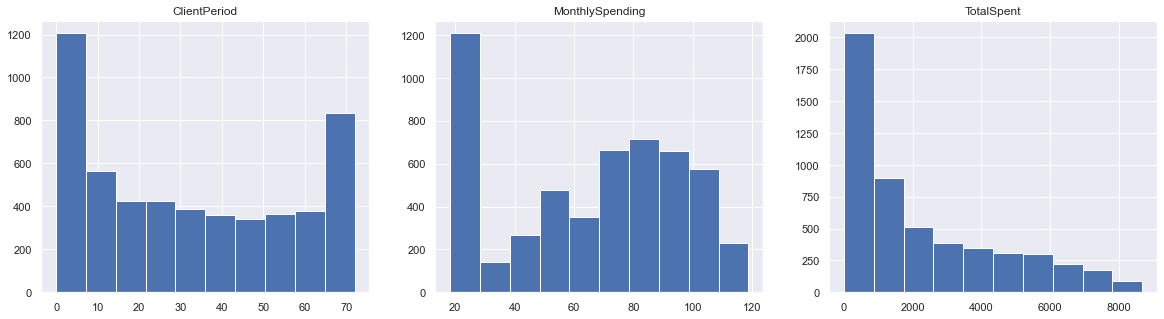

In [207]:
# Распределение численных признаков
fig = plt.figure(figsize=(20, 5))
axs = fig.subplots(1, 3)

for ind, feature in enumerate(num_cols):
    axs[ind].hist(data[feature])
    axs[ind].set_title(feature)

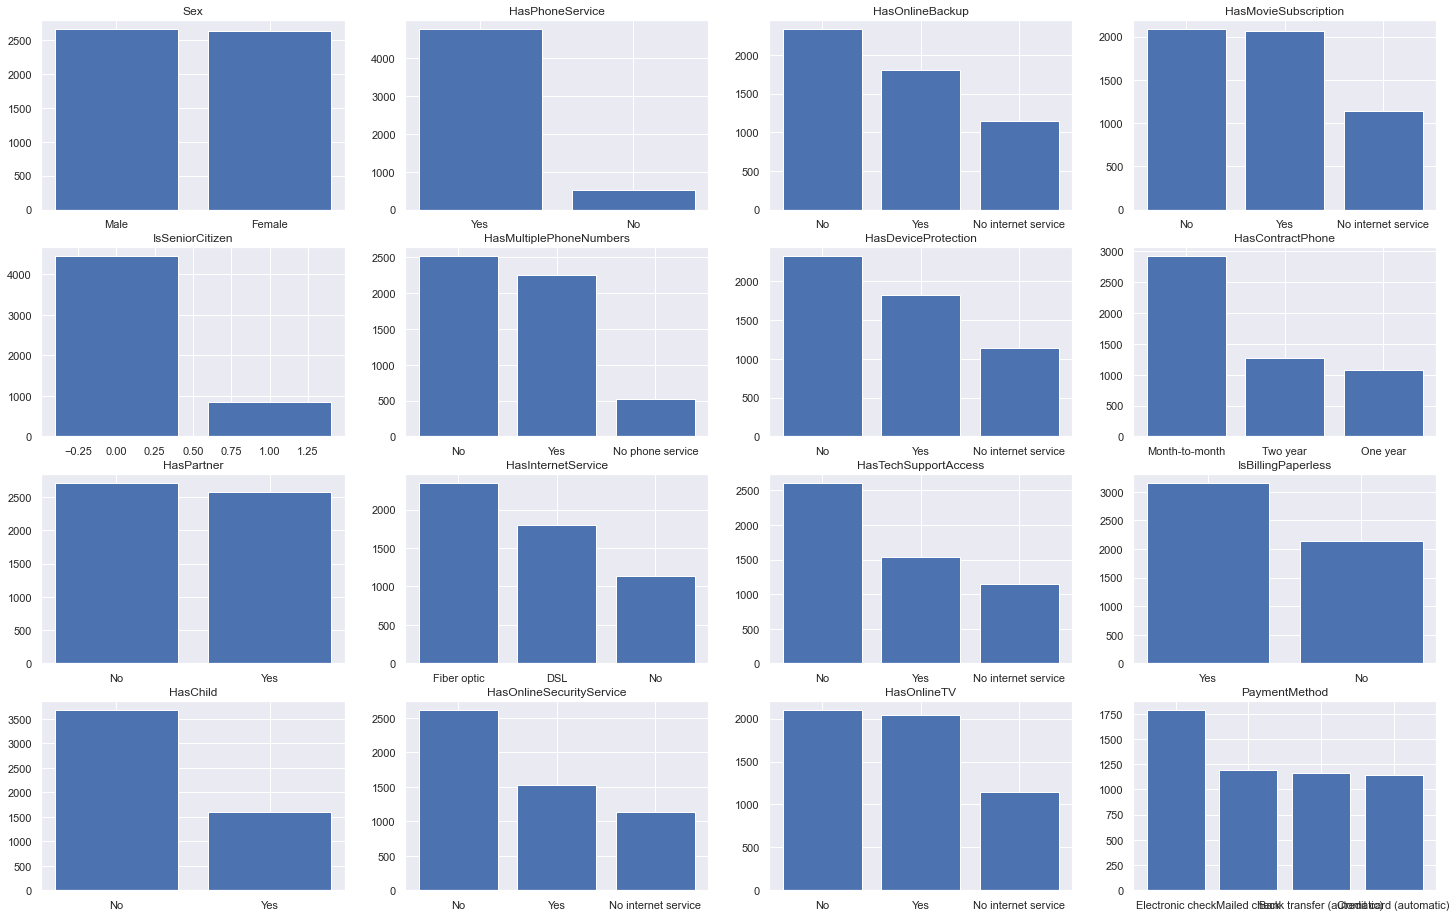

In [208]:
# Распределение категориальных признаков
fig = plt.figure(figsize=(25, 16))
axs = fig.subplots(4, 4)
x, y = 0, 0

for ind, col in enumerate(cat_cols):
    x = ind % 4
    y = ind // 4
    cat_data = data[col].value_counts()
    key = cat_data.keys()
    val = cat_data.values
    axs[x, y].bar(key, val)
    axs[x, y].set_title(col)

plt.show()


0    3898
1    1384
Name: Churn, dtype: int64


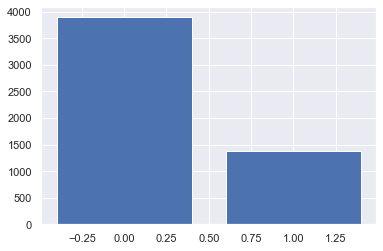

In [209]:
# Распределение целевой переменной
target_data_graph = data[target_col].value_counts()
print(target_data_graph)
plt.bar(target_data_graph.keys(), target_data_graph.values)
plt.show()

Из полученного графика видно, что количество элементов нулевого класса в 2.8 раз больше, чем первого. Следовательно, классы являются слабо сбалансированными, но это не критическая проблема

## Применение линейных моделей (3 балла)

1) Обработайте данные для того, чтобы к ним можно было применить LogisticRegression. Т.е. отнормируйте числовые признаки, а категориальные закодируйте с помощью one-hot-encoding'а. 

2) С помощью кроссвалидации или разделения на train/valid выборку протестируйте разные значения гиперпараметра C и выберите лучший (можно тестировать С=100, 10, 1, 0.1, 0.01, 0.001) по метрике ROC-AUC. 

Если вы разделяете на train/valid, то используйте LogisticRegressionCV. Он сам при вызове .fit() подберет параметр С. (не забудьте передать scroing='roc_auc', чтобы при кроссвалидации сравнивались значения этой метрики, и refit=True, чтобы при потом модель обучилась на всем датасете с лучшим параметром C). 


(более сложный вариант) Если вы будете использовать кроссвалидацию, то преобразования данных и LogisticRegression нужно соединить в один Pipeline с помощью make_pipeline, как это делалось во втором семинаре. Потом pipeline надо передать в GridSearchCV. Для one-hot-encoding'a можно испльзовать комбинацию LabelEncoder + OneHotEncoder (сначала превращаем строчки в числа, а потом числа првращаем в one-hot вектора.)

In [210]:
from sklearn.linear_model import LogisticRegression, LogisticRegressionCV
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler, RobustScaler, LabelEncoder, OneHotEncoder
from sklearn.pipeline import make_pipeline
from sklearn.metrics import roc_auc_score, roc_curve

In [211]:
# Разбиваем на фичи/ответы
X = data.drop(columns=target_col, inplace=False)
y = data[target_col]


X = pd.get_dummies(X, columns=cat_cols, drop_first=True)


In [212]:
# Нормировка данных
pca = StandardScaler()
X = pca.fit_transform(X)

In [213]:
# Разделяем выборку на тренировочную/тестовую части 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [214]:
# Обучаем модель с разными параметрами C
log_reg_gscv = GridSearchCV(LogisticRegression(), 
                               [{'C': [100, 10, 1, 0.1, 0.01, 0.001]}],
                               cv=5,
                               n_jobs=8)
log_reg_gscv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=LogisticRegression(), n_jobs=8,
             param_grid=[{'C': [100, 10, 1, 0.1, 0.01, 0.001]}])

In [215]:
# Наилучшее качетсво достигается при С = 100
print(log_reg_gscv.best_params_)

{'C': 10}


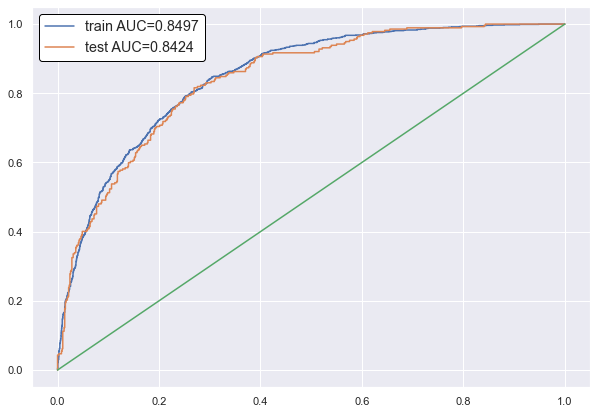

In [216]:
# Строим ROC-AUC кривую, чтобы оценить качетсво модели
y_train_pred = log_reg_gscv.predict_proba(X_train)[:, 1]
y_test_pred = log_reg_gscv.predict_proba(X_test)[:, 1]

train_auc = roc_auc_score(y_train, y_train_pred)
test_auc = roc_auc_score(y_test, y_test_pred)

plt.figure(figsize=(10,7))
plt.plot(*roc_curve(y_train, y_train_pred)[:2], label='train AUC={:.4f}'.format(train_auc))
plt.plot(*roc_curve(y_test, y_test_pred)[:2], label='test AUC={:.4f}'.format(test_auc))
legend_box = plt.legend(fontsize='large', framealpha=1).get_frame()
legend_box.set_facecolor("white")
legend_box.set_edgecolor("black")
plt.plot(np.linspace(0,1,100), np.linspace(0,1,100))
plt.show()

По метрике ROC-AUC лучшее качетсо, которого удалось достичь: 0.8408. С параметром "С"=100

## Применение градиентного бустинга (2 балла)

Если вы хотите получить баллы за точный ответ, то стоит попробовать градиентный бустинг. Часто градиентный бустинг с дефолтными параметрами даст вам 80% результата за 0% усилий.

Мы будем использовать catboost, поэтому нам не надо кодировать категориальные признаки. catboost сделает это сам (в .fit() надо передать cat_features=cat_cols). А численные признаки нормировать для моделей, основанных на деревьях не нужно.

1) Разделите выборку на train/valid. Протестируйте catboost cо стандартными параметрами.

2) Протестируйте разные занчения параметроа количества деревьев и learning_rate'а и выберите лучшую по метрике ROC-AUC комбинацию. 

(Дополнительно) Есть некоторые сложности с тем, чтобы использовать CatBoostClassifier вместе с GridSearchCV, поэтому мы не просим использовать кроссвалидацию. Но можете попробовать)

In [217]:
from catboost import CatBoostClassifier

In [290]:
# Загружаем данные заново и чистим 
data = pd.read_csv('./train.csv')

data["TotalSpent"] = data['TotalSpent'].replace(' ', 0).astype(float)

X = data.drop(columns=target_col, inplace=False)
y = data[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [291]:
# Обучаем модель
catboost_clf = CatBoostClassifier(
    # iterations=1200, 
    # learning_rate=0.05, 
    custom_loss=['AUC'],
    depth=7,
    loss_function='CrossEntropy'
)


catboost_clf.fit(X_train, y_train, 
        cat_features=cat_cols, 
        eval_set=(X_test, y_test), 
        verbose=False,
        plot=True,
        # use_best_model=True
)

print('CatBoost model is fitted: ' + str(catboost_clf.is_fitted()))
print('CatBoost model parameters:')
print(catboost_clf.get_params())

MetricVisualizer(layout=Layout(align_self='stretch', height='500px'))

CatBoost model is fitted: True
CatBoost model parameters:
{'depth': 7, 'loss_function': 'CrossEntropy', 'custom_loss': ['AUC']}


Получившиеся модели +-одинаковы по скору (по метрике ROC-AUC)

In [292]:
catboost_clf.get_all_params()

{'nan_mode': 'Min',
 'eval_metric': 'CrossEntropy',
 'combinations_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderType=MinEntropy:Prior=0/1:Prior=0.5/1:Prior=1/1',
  'Counter:CtrBorderCount=15:CtrBorderType=Uniform:Prior=0/1'],
 'iterations': 1000,
 'sampling_frequency': 'PerTree',
 'fold_permutation_block': 0,
 'leaf_estimation_method': 'Newton',
 'counter_calc_method': 'SkipTest',
 'grow_policy': 'SymmetricTree',
 'penalties_coefficient': 1,
 'boosting_type': 'Plain',
 'model_shrink_mode': 'Constant',
 'feature_border_type': 'GreedyLogSum',
 'ctr_leaf_count_limit': 18446744073709551615,
 'bayesian_matrix_reg': 0.10000000149011612,
 'one_hot_max_size': 2,
 'eval_fraction': 0,
 'force_unit_auto_pair_weights': False,
 'l2_leaf_reg': 3,
 'random_strength': 1,
 'rsm': 1,
 'boost_from_average': False,
 'max_ctr_complexity': 4,
 'model_size_reg': 0.5,
 'simple_ctr': ['Borders:CtrBorderCount=15:CtrBorderType=Uniform:TargetBorderCount=1:TargetBorderTyp

# Предсказания

In [293]:
# Берём лучшую модель
best_model = catboost_clf

In [294]:
# Обработка данных, с которыми работает модель
X_test = pd.read_csv('./test.csv')

X_test["TotalSpent"] = X_test['TotalSpent'].replace(' ', 0).astype(float)
# X_test = pd.get_dummies(X_test, columns=cat_cols, drop_first=True)
# pca = StandardScaler()
# X_test = pca.fit_transform(X_test)

submission = pd.read_csv('./submission.csv')
submission['Churn'] = 1 - best_model.predict_proba(X_test)
submission[["Id", "Churn"]].to_csv('./my_submission.csv', index=False)

In [295]:
submission.head()

,Id,Churn
0,0,0.054527
1,1,0.659687
2,2,0.667245
3,3,0.014017
4,4,0.006088


Ник на Каггле: Вадим_Баташев https://www.kaggle.com/felecort
  
Прямая ссылка на Score:          https://www.kaggle.com/competitions/advanced-dls-spring-2021/leaderboard?search=Felecort  
Или вот(Недавно ник изменил, мб ещё не будет отображаться)     https://www.kaggle.com/competitions/advanced-dls-spring-2021/leaderboard?search=%D0%92%D0%B0%D0%B4%D0%B8%D0%BC_%D0%91%D0%B0%D1%82%D0%B0%D1%88%D0%B5%D0%B2

Получившийся Score: 0.84460

# Kaggle (5 баллов)

Как выставить баллы:

1) 1 >= roc auc > 0.84 это 5 баллов

2) 0.84 >= roc auc > 0.7 это 3 балла

3) 0.7 >= roc auc > 0.6 это 1 балл

4) 0.6 >= roc auc это 0 баллов


Для выполнения задания необходимо выполнить следующие шаги.
* Зарегистрироваться на платформе [kaggle.com](kaggle.com). Процесс выставления оценок будет проходить при подведении итогового рейтинга. Пожалуйста, укажите во вкладке Team -> Team name свои имя и фамилию в формате Имя_Фамилия (важно, чтобы имя и фамилия совпадали с данными на Stepik).
* Обучить модель, получить файл с ответами в формате .csv и сдать его в конкурс. Пробуйте и экспериментируйте. Обратите внимание, что вы можете выполнять до 20 попыток сдачи на kaggle в день.
* После окончания соревнования отправить в итоговый ноутбук с решением на степик. 
* После дедлайна проверьте посылки других участников по критериям. Для этого надо зайти на степик, скачать их ноутбук и проверить скор в соревновании.